# <center>Machine Learning Report</center>
### <center>Donato Meoli</center>

<center>Machine Learning course 654AA</center>
<center>Academic year: 2019/2020</center>

<center>Type of project: A with Computational Mathematics</center>

## Abstract

I developed a sklearn compatible module with some of the most importat machine learning models (e.g. linear models, deep neural networks and SVMs).

## Monk's Problem

### Support Vector Classifier

In [1]:
from utils import load_monk
from ml.svm import SVC
from sklearn.metrics import classification_report

#### Monk #1

In [3]:
X_train, X_test, y_train, y_test = load_monk(1)

svc = SVC(kernel='poly', degree=3, gamma='scale', verbose=5)
svc.fit(X_train, y_train)
print(classification_report(y_test, svc.predict(X_test)))

iter	f(x)
   0	-1.3103e+01
   5	-1.5372e+01
  10	-1.5373e+01
  15	-1.5650e+01
  20	-1.5653e+01
  25	-1.5653e+01
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       216
         1.0       1.00      1.00      1.00       216

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



#### Monk #2

In [4]:
X_train, X_test, y_train, y_test = load_monk(2)

svc = SVC(kernel='poly', C=1000, degree=2, gamma='scale', verbose=5)
svc.fit(X_train, y_train)
print(classification_report(y_test, svc.predict(X_test)))

iter	f(x)
   0	-1.2859e+02
   5	-3.4749e+02
  10	-3.6481e+02
  15	-3.6638e+02
  20	-3.6654e+02
  25	-3.6655e+02
  30	-3.6655e+02
  35	-3.6655e+02
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       290
         1.0       1.00      1.00      1.00       142

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



#### Monk #3

In [5]:
X_train, X_test, y_train, y_test = load_monk(3)

svc = SVC(kernel='poly', C=100, degree=4, gamma='auto', verbose=5)
svc.fit(X_train, y_train)
print(classification_report(y_test, svc.predict(X_test)))

iter	f(x)
   0	-2.4690e+03
   5	-2.5680e+03
  10	-2.6527e+03
  15	-2.6544e+03
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       204
         1.0       0.99      0.95      0.97       228

    accuracy                           0.97       432
   macro avg       0.97      0.97      0.97       432
weighted avg       0.97      0.97      0.97       432



### Neural Network

In [1]:
from ml.activations import sigmoid, softmax
from ml.layers import FullyConnected
from ml.losses import cross_entropy
from ml.neural_network import NeuralNetworkClassifier
from optimization.unconstrained.quasi_newton import BFGS
from utils import load_monk
from sklearn.metrics import classification_report
from utils import plot_model_accuracy, plot_model_loss

#### Monk #1

iter	f eval	f(x)		||g(x)||	ls	it	a*			rho
   0	   1	4.1679e-01	5.0283e+01	 1	12	1.0082e-02	3.9227e-02
  10	 125	1.5075e-01	6.9377e+00	 1	16	8.6288e-01	1.3709e-01
  20	 290	4.7425e-02	1.1281e+00	 5	10	1.4974e+00	1.9546e+00
  30	 455	4.2738e-02	4.3015e-01	 1	 0	1.0000e+00	1.7682e+02
  40	 537	4.1599e-02	2.2213e-01	 1	 0	1.0000e+00	1.6870e+01
  50	 650	3.8930e-02	2.5029e-01	 6	10	1.6495e+00	2.0412e+01
  60	 730	3.7851e-02	7.5808e-02	11	 8	2.7818e+00	7.6177e+01
  70	 804	3.7733e-02	3.2329e-02	 6	 6	1.5244e+00	5.3647e+02
  80	 904	3.7651e-02	2.3535e-02	 1	 0	1.0000e+00	2.4614e+03
  90	 974	3.7597e-02	1.8962e-02	11	 7	2.8091e+00	1.1322e+03


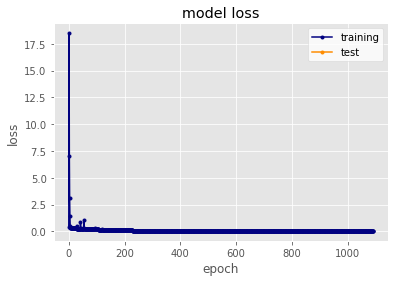

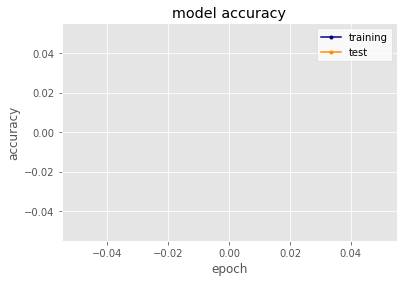

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       216
         1.0       1.00      1.00      1.00       216

    accuracy                           1.00       432
   macro avg       1.00      1.00      1.00       432
weighted avg       1.00      1.00      1.00       432



In [4]:
X_train, X_test, y_train, y_test = load_monk(1)
net = NeuralNetworkClassifier((FullyConnected(17, 4, sigmoid),
                               FullyConnected(4, 2, softmax)),
                              loss=cross_entropy, optimizer=BFGS, epochs=100, 
                              validation_split=0.2, verbose=10)
net.fit(X_train, y_train)
plot_model_loss(net.loss_history)
plot_model_accuracy(net.accuracy_history)
print(classification_report(y_test, net.predict(X_test)))

#### Monk #2

iter	f eval	f(x)		||g(x)||	ls	it	a*			rho
   0	   1	4.2424e-01	8.6577e+01	 1	20	6.5175e-03	2.0470e-02
  10	 127	2.3345e-01	1.3430e+01	 1	 8	8.8329e-01	8.4619e-02
  20	 255	6.4801e-02	3.8147e+00	 1	14	7.3031e-01	5.4856e-01
  30	 377	4.3818e-02	4.0090e-01	 6	 9	1.6556e+00	2.2018e+01
  40	 470	4.3251e-02	2.4026e-01	 1	 0	1.0000e+00	3.3258e+02
  50	 548	4.3159e-02	1.0251e-01	 1	 0	1.0000e+00	3.8855e+03
  60	 642	4.3130e-02	2.3963e-02	 1	 0	1.0000e+00	1.5073e+03
  70	 745	4.2946e-02	1.9797e-01	 1	11	6.9036e-01	6.2723e+01
  80	 853	4.1016e-02	3.3618e-01	 1	11	8.2023e-01	1.6374e+01
  90	 950	4.0233e-02	1.9809e-01	11	 9	2.7247e+00	3.2657e+01


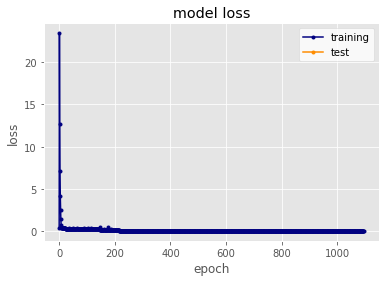

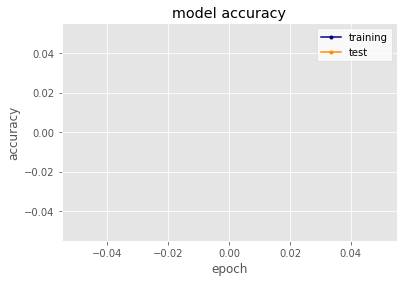

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       290
         1.0       0.96      1.00      0.98       142

    accuracy                           0.99       432
   macro avg       0.98      0.99      0.98       432
weighted avg       0.99      0.99      0.99       432



In [5]:
X_train, X_test, y_train, y_test = load_monk(2)
net = NeuralNetworkClassifier((FullyConnected(17, 4, sigmoid),
                               FullyConnected(4, 2, softmax)),
                              loss=cross_entropy, optimizer=BFGS, epochs=100, 
                              validation_split=0.2, verbose=10)
net.fit(X_train, y_train)
plot_model_loss(net.loss_history)
plot_model_accuracy(net.accuracy_history)
print(classification_report(y_test, net.predict(X_test)))

#### Monk #3

iter	f eval	f(x)		||g(x)||	ls	it	a*			rho
   0	   1	3.8604e-01	1.9017e+01	 1	15	1.5370e-02	1.7990e-01
  10	 141	3.8247e-02	2.5680e+00	 1	12	7.1834e-01	6.1382e-01
  20	 314	2.4490e-02	3.3958e-01	 5	10	1.4045e+00	1.3133e+01
  30	 476	2.2517e-02	1.3637e-01	 9	 5	2.3163e+00	3.0038e+01
  40	 621	2.2210e-02	5.2623e-02	 1	 0	1.0000e+00	3.7456e+03
  50	 701	2.2071e-02	4.1375e-02	15	 8	4.2433e+00	3.7164e+02
  60	 789	2.1898e-02	4.0129e-02	 1	 0	1.0000e+00	2.9155e+03
  70	 883	2.1879e-02	4.3710e-02	 1	 0	1.0000e+00	1.4042e+03
  80	 957	2.1851e-02	1.2650e-02	14	 7	3.6673e+00	3.1481e+03


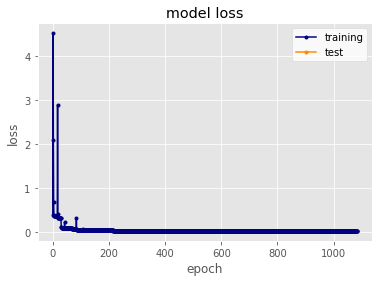

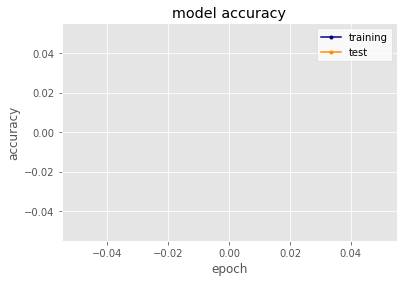

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       204
         1.0       1.00      0.96      0.98       228

    accuracy                           0.98       432
   macro avg       0.98      0.98      0.98       432
weighted avg       0.98      0.98      0.98       432



In [6]:
X_train, X_test, y_train, y_test = load_monk(3)
net = NeuralNetworkClassifier((FullyConnected(17, 4, sigmoid),
                               FullyConnected(4, 2, softmax)),
                              loss=cross_entropy, optimizer=BFGS, epochs=100, 
                              validation_split=0.2, verbose=10)
net.fit(X_train, y_train)
plot_model_loss(net.loss_history)
plot_model_accuracy(net.accuracy_history)
print(classification_report(y_test, net.predict(X_test)))